# Homework 1

CS 637, Spring 2022

Due 3/3/21

1) Implement an API to create a fully-connected multilayer perceptron (MLP) for a *k*-class classification problem.

2) Test this implementation on MNIST data.

Notation

*  `w`: weights
*  `b`: biases
*  `z`: aggregated values
*  `a`: activated values
*  `x`: input to a neural network
*  `yhat`: output from a neural network (i.e., *after* softmax if applied)

In [ ]:
# Install my API
!pip install -e git+https://github.com/vtd9/deep-learning.git@api_packaging#egg=mlp_api

Obtaining mlp_api from git+https://github.com/vtd9/deep-learning.git@api_packaging#egg=mlp_api
  Cloning https://github.com/vtd9/deep-learning.git (to revision api_packaging) to ./src/mlp-api
  Running command git clone -q https://github.com/vtd9/deep-learning.git /content/src/mlp-api
  Running command git checkout -b api_packaging --track origin/api_packaging
  Switched to a new branch 'api_packaging'
  Branch 'api_packaging' set up to track remote branch 'api_packaging' from 'origin'.
  Running setup.py develop for mlp-api


In [ ]:
import site
site.main()
from mlp_api import *

In [ ]:
# Import other dependencies
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6) # Set size of plots in notebook

# 1. API

In [ ]:
# TEMP: hinge loss bumbling
yhat = np.random.normal(size=(4,3)).T
y = np.zeros((4, 3)).T
y[0, 0] = 1
y[2, 1] = 1
y[1, 2] = 1
y[0, 3] = 1
yhat, y

(array([[ 0.04758763,  0.20892514,  1.33276845,  0.65824514],
        [-1.32605593, -0.74280851,  0.16777672, -0.49693205],
        [-0.63654732, -0.23177458, -0.4135918 , -0.47737195]]),
 array([[1., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]]))

In [ ]:
# TEMP
y_target = np.sum(np.where(y == 1, yhat, 0), axis=0)
dist = np.where(y == 1, 0, yhat - y_target + 1.)
maybe_deriv = np.where(y == 1, np.sum(dist > 0, axis=0), dist > 0)
dist, maybe_deriv

(array([[ 0.        ,  1.44069972,  2.16499173,  0.        ],
        [-0.37364356,  0.48896608,  0.        , -0.15517718],
        [ 0.31586505,  0.        ,  0.41863148, -0.13561709]]),
 array([[1, 1, 1, 0],
        [0, 1, 2, 0],
        [1, 2, 1, 0]]))

# 2. Testing the API

## 2.1 Import the MNIST dataset
*   Permitted to use outside packages for downloading MNIST data, so use `keras`.
*   Merge existing training and test sets and resplit, since splitting must be done by this homework's API.



In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
mnist_all_X = np.concatenate((train_X, test_X), axis=0)
mnist_all_y = np.concatenate((train_y, test_y), axis=0)
print('MNIST features reshaped:', mnist_all_X.shape, 
      '\nMNIST labels reshaped:', mnist_all_y.shape)

MNIST features reshaped: (70000, 28, 28) 
MNIST labels reshaped: (70000,)


## 2.2 Preprocessing

Feature and label shapes: (784, 70000) (10, 70000)


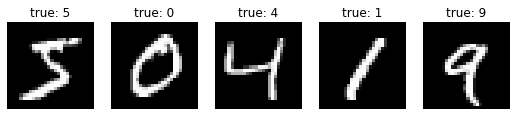

In [ ]:
# Make a Dataset object
mnist_set = Dataset(mnist_all_X, mnist_all_y)

# Reshape the data
width = 28
categories = 10
mnist_set.shape(width, categories)
print("Feature and label shapes:", mnist_set.X.shape, mnist_set.y.shape)

# Visualize the first five images
Utility.plot_images(mnist_set, 5)

Splits on training, validation, & testing: (784, 49000) (784, 10500) (784, 10500)


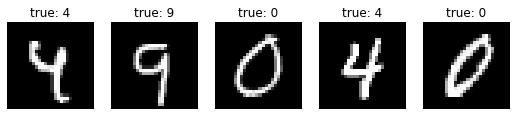

In [ ]:
# Shuffle the data
mnist_set.shuffle()
Utility.plot_images(mnist_set, 5)

# Divide the data
mnist_set.divide()
print('Splits on training, validation, & testing:', 
      mnist_set.X_train.shape, mnist_set.X_valid.shape, mnist_set.X_test.shape)

## 2.3 Training and validation

In [ ]:
# Hyperparameters to use throughout all models
batch = 100
epochs = 15

### 2.3.1 Varying the learning rate

In [ ]:
dims = (width*width, 128, 64, 10)
activ_fns = (Activation.relu, Activation.relu, Activation.softmax)

# Make a generic neural network with two hidden layers
p_128_64 = Perceptron(dims, activ_fns, Loss.cross_entropy)

# Different learning rates to test
lr_results = {}
lrs = (5e-4, 0.002, 0.01)
for lr in lrs:
  p_128_64.reset() # Reinitialize parameters
  lr_results[lr] = Utility.train_epochs(p_128_64, mnist_set, lr, epochs, batch)

Epoch 	Train_loss 	Train_acc
0 	    3.380 	    0.185
1 	    2.089 	    0.371
2 	    1.625 	    0.491
3 	    1.378 	    0.559
4 	    1.220 	    0.607
5 	    1.109 	    0.643
6 	    1.025 	    0.670
7 	    0.960 	    0.692
8 	    0.906 	    0.710
9 	    0.862 	    0.725
10 	    0.825 	    0.737
11 	    0.794 	    0.748
12 	    0.766 	    0.758
13 	    0.742 	    0.767
14 	    0.720 	    0.773
Time elapsed (s): 35.2

Epoch 	Train_loss 	Train_acc
0 	    1.952 	    0.460
1 	    0.978 	    0.695
2 	    0.780 	    0.756
3 	    0.683 	    0.788
4 	    0.623 	    0.808
5 	    0.581 	    0.821
6 	    0.549 	    0.832
7 	    0.524 	    0.841
8 	    0.504 	    0.848
9 	    0.486 	    0.854
10 	    0.471 	    0.859
11 	    0.458 	    0.864
12 	    0.447 	    0.867
13 	    0.436 	    0.870
14 	    0.427 	    0.873
Time elapsed (s): 38.0

Epoch 	Train_loss 	Train_acc
0 	    1.033 	    0.705
1 	    0.540 	    0.838
2 	    0.461 	    0.862
3 	    0.420 	    0.875
4 	    0.391 	    0.884
5 	    0.369 	 

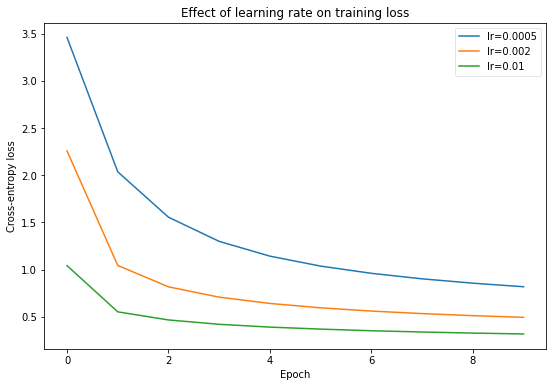

In [ ]:
# Plot training loss for the different learning rates used
Utility.plot_results([lr_results[_][0] for _ in lrs],
                     labels=['lr=' + str(lr) for lr in lrs],
                     ylabel='Cross-entropy loss',
                     title='Effect of learning rate on training loss')

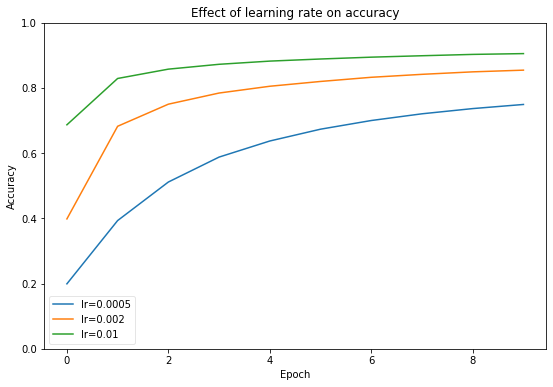

In [ ]:
# Plot training accuracy for the different learning rates used
Utility.plot_results([lr_results[_][1] for _ in lrs],
                     labels=['lr=' + str(lr) for lr in lrs],
                     ylabel='Accuracy', ymax=1.0,
                     title='Effect of learning rate on accuracy')

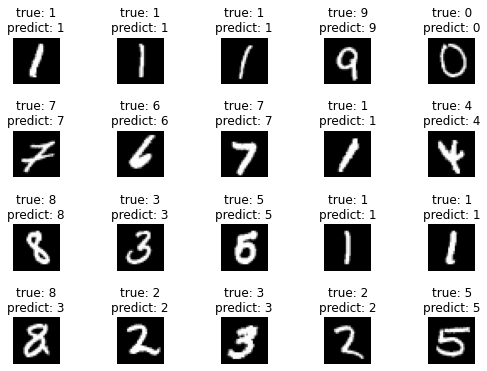

In [ ]:
# Visualize images from a random sample
Utility.plot_images(mnist_set, 20, True, p_128_64)

### 2.3.2 Changing the architecture

*   Number of hidden layers
*   Number of neurons per layer



In [ ]:
# Define different architectures to try
arch_results = {}
lr = 0.001
dims_set = ((width*width, 64, 32, 10),
            (width*width, 256, 128, 10), 
            (width*width, 256, 128, 64, 10))
activ_fns_set = ((Activation.relu, Activation.relu, Activation.softmax),
                 (Activation.relu, Activation.relu, Activation.softmax),
                 (Activation.relu, Activation.relu, Activation.relu, Activation.softmax))

In [ ]:
# Train models, validate
for dims, activ_fns in zip(dims_set, activ_fns_set):
  p = Perceptron(dims, activ_fns, Loss.cross_entropy)
  arch_results[dims] = Utility.train_and_validate(p, mnist_set, 
                                                  lr, epochs, batch)

Epoch 	Train_loss 	Train_acc 	Valid_loss 	Valid_acc
0 	    2.344 	    0.231 	     3.323 	    0.142
1 	    1.654 	    0.445 	     1.891 	    0.347
2 	    1.316 	    0.581 	     1.451 	    0.533
3 	    1.107 	    0.654 	     1.193 	    0.630
4 	    0.970 	    0.698 	     1.024 	    0.689
5 	    0.875 	    0.729 	     0.910 	    0.723
6 	    0.806 	    0.750 	     0.829 	    0.749
7 	    0.753 	    0.766 	     0.768 	    0.768
8 	    0.712 	    0.779 	     0.722 	    0.783
9 	    0.679 	    0.790 	     0.685 	    0.795
Time elapsed (s): 20.5

Epoch 	Train_loss 	Train_acc 	Valid_loss 	Valid_acc
0 	    3.032 	    0.449 	     8.648 	    0.116
1 	    1.379 	    0.682 	     1.636 	    0.627
2 	    1.073 	    0.744 	     1.151 	    0.721
3 	    0.925 	    0.775 	     0.961 	    0.763
4 	    0.834 	    0.795 	     0.851 	    0.788
5 	    0.770 	    0.810 	     0.780 	    0.804
6 	    0.723 	    0.819 	     0.729 	    0.817
7 	    0.684 	    0.830 	     0.688 	    0.826
8 	    0.653 	    0.836 	 

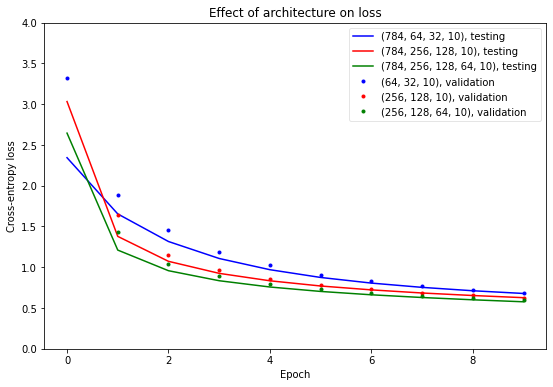

In [ ]:
# Plot loss for the different architectures tried
Utility.plot_results([arch_results[_][0] for _ in dims_set],
                     labels=[str(dims) + ', testing' for dims in dims_set],
                     fmts=['-' + _ for _ in ('b', 'r', 'g')])

Utility.plot_results([arch_results[_][2] for _ in dims_set],
                     labels=[str(dims[1:]) + ', validation' for dims in dims_set],
                     fmts=['.' + _ for _ in ('b', 'r', 'g')],
                     ylabel='Cross-entropy loss', ymax=4.0,
                     title='Effect of architecture on loss')

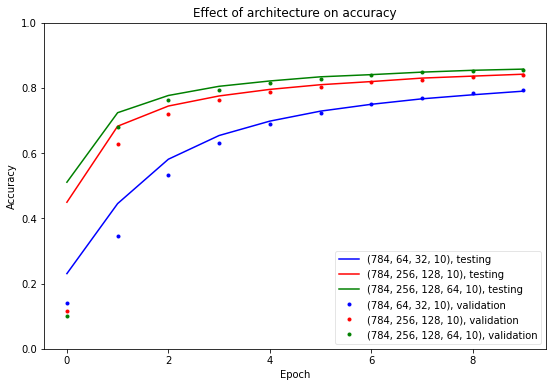

In [ ]:
# Plot accuracy for different architectures tried
Utility.plot_results([arch_results[_][1] for _ in dims_set],
                     labels=[str(dims) + ', testing' for dims in dims_set],
                     fmts=['-' + _ for _ in ('b', 'r', 'g')])
Utility.plot_results([arch_results[_][3] for _ in dims_set],
                     labels=[str(dims) + ', validation' for dims in dims_set],
                     fmts=['.' + _ for _ in ('b', 'r', 'g')],
                     ylabel='Accuracy', ymax=1.0,
                     title='Effect of architecture on accuracy')

## 2.4 Testing

Report performance by passing the test set through a trained model.

In [ ]:
# Generate batches from test data, pass through model
test_gen = mnist_set.make_batches(batch, 'test')
loss, acc = p_128_64.train(test_gen, train_mode=False) 
print('Cross-entropy loss: {:.3f}\nAccuracy: {:.3f}'.format(loss, acc))

Cross-entropy loss: 0.316
Accuracy: 0.908


# 3. Appendix

Simple tests to check basic functionality with hand calculations.

Hinge loss examples from class on 1/20/22

In [ ]:
# 3-class classification example
ex1 = np.array([-3.7, 5, 7]).T
print('Target class is 3, loss={:0.1f} \tif 2, {:0.1f} \tif 1, {:0.1f}'.format(
    Loss.hinge_loss(ex1, np.array([0, 0, 1]).T),
    Loss.hinge_loss(ex1, np.array([0, 1, 0]).T),
    Loss.hinge_loss(ex1, np.array([1, 0, 0]).T)))

Target class is 3, loss=0.0 	if 2, 3.0 	if 1, 21.4


In [ ]:
# 4-class classification example
ex2 = np.array([2.5, 2.0, 2.7, 1.7]).T
print('Target class is 2: {:0.1f}'.format(
    Loss.hinge_loss(ex2, np.array([0, 1, 0, 0]).T)))

Target class is 2: 3.9


Compute accuracy on two examples, one predicted correctly and one not:

In [ ]:
yhat = np.array(((0.2, 0.5, 0.3), (0.7, 0.2, 0.1))).T
y = np.array(((0, 1, 0), (0, 1, 0))).T
Loss.accuracy(yhat, y)

0.5

Informal problem given at the end of class, 1/25/22:

In [ ]:
p = Perceptron((4, 3, 2, 4), 
               (Activation.relu, Activation.sigmoid, Activation.softmax), 
               Loss.cross_entropy, init_with_normal=True)
p[1].w = np.array([[1.,0,0,0], [0,1,0,0], [0,0,1,0]])
p[2].w = np.array([[1.,0,0], [0,1,0]])
p[3].w = np.array([[1.,0], [0,1], [0,0], [0,0]])
p.zero_biases()

# Check forward path
p.forward(np.array([1, 0, 1, 0]).reshape(-1, 1), batch_size=1)
for i in range(1, len(p.dims)):
  print('Layer', i, '\nz =\n', p[i].z, '\na =\n', p[i].a, '\n')

Layer 1 
z =
 [[1.]
 [0.]
 [1.]] 
a =
 [[1.]
 [0.]
 [1.]] 

Layer 2 
z =
 [[1.]
 [0.]] 
a =
 [[0.73105858]
 [0.5       ]] 

Layer 3 
z =
 [[0.73105858]
 [0.5       ]
 [0.        ]
 [0.        ]] 
a =
 [[0.36278004]
 [0.28793597]
 [0.17464199]
 [0.17464199]] 



In [ ]:
# Check backpropagation
y = np.array([0., 1., 0., 0.]).reshape(-1, 1) # Dummy one-hot label
print('p[1].w before backprop\n', p[1].w)
p.backward(y, lr=0.5, batch_size=1)
print('p[1].w after backprop\n', p[1].w)

Activation.softmax(p[3].w @ p[2].a + p[3].b)

p[1].w before backprop
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
p[1].w after backprop
 [[1.14602577 0.         0.14602577 0.        ]
 [0.44348754 1.         0.44348754 0.        ]
 [0.19954557 0.         1.19954557 0.        ]]


array([[0.23755303],
       [0.49192843],
       [0.13525927],
       [0.13525927]])